In [61]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import svm
import datetime
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import statsmodels.api as sm

import itertools
import optuna

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import arima_model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [62]:
wb1 = openpyxl.load_workbook(r"data_sheets\Книга1.xlsx")
sheet = wb1['Лист4']

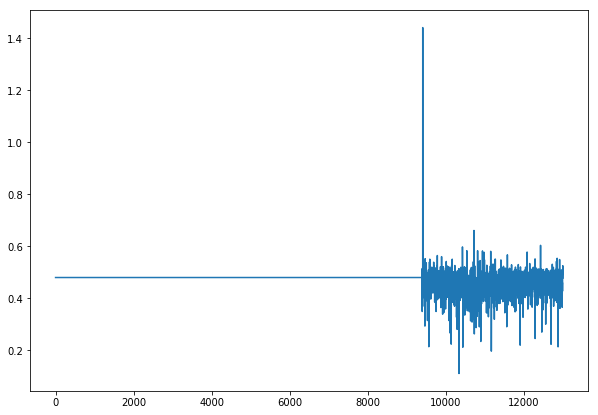

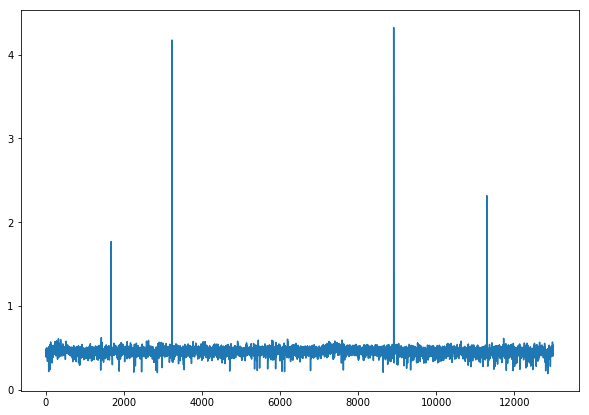

In [68]:
start = datetime.datetime.now()
timer = []
batch_train = []
batch_test = []
n = 4530
border = 17530
num = 30530
for i in range (1, border-n):
    timer.append(sheet.cell(row = i+n, column = 2).value)
    batch_train.append(float(sheet.cell(row = i+n, column = 7).value))
for j in range (border-n, num-n-1):
    timer.append(sheet.cell(row = j+n, column = 2).value)
    batch_test.append(float(sheet.cell(row = j+n, column = 7).value))
plt.plot(batch_train)
plt.show()
plt.plot(batch_test)
plt.show()

    

In [69]:
df1 =  pd.DataFrame(columns = ["flow1"])
df1.flow1 = batch_test

model1 = SARIMAX(df1, order=(1, 1, 1), seasonal_order=(2, 1, 1, 19))
result1 = model1.fit()

prog_start = 0

pred1 = result1.get_prediction(start = prog_start, dynamic = False)
forecast_values1 = pred1.predicted_mean

In [70]:
difference = np.mean(forecast_values1 - batch_train)
forecast_mse1 = np.sqrt(((forecast_values1 - batch_train) ** 2).mean())
print(forecast_mse1, difference)

0.045880909333906865 -0.014326022068990666


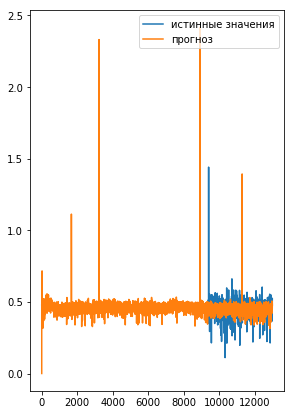

In [72]:
#forecast_mse1 = ((forecast_values1 - batch_test) ** 2).mean()
    
figure = pylab.subplot(1,2,2)
figure1 = pylab.plot(batch_train, label = "истинные значения")
figure2 = pylab.plot(forecast_values1, label = "прогноз")
pylab.legend()

In [50]:
def params_optimization(dataset, dataset_test, seasonal, non_seasonal, cycles):
    for i in range (10, cycles):
        seasonal[3] = i
        try:
            model1 = SARIMAX(dataset, order=non_seasonal, seasonal_order=seasonal)
            result1 = model1.fit()
        except:
            continue
        pred1 = result1.get_prediction(start = prog_start, dynamic = False)
        forecast_values1 = pred1.predicted_mean
        difference = np.mean(forecast_values1 - dataset_test)
        forecast_mse_temp = np.sqrt(((forecast_values1 - dataset_test) ** 2).mean())
        print(seasonal, difference, forecast_mse_temp)  
    return [difference, forecast_mse_temp]
    

In [51]:
params_non_seasonal = [1, 1, 1]
params_seasonal = [2, 1, 1, 10]
print(params_optimization(df1, batch_train, params_seasonal, params_non_seasonal, 27))


[2, 1, 1, 10] 18.583233892399026 29.670142588435812
[2, 1, 1, 11] 18.566917025388396 29.677186466479448
[2, 1, 1, 12] 18.529826147949002 29.58787502125605
[2, 1, 1, 13] 18.527061927159945 29.676725919681623
[2, 1, 1, 14] 18.573786953477466 29.66158823295941
[2, 1, 1, 15] 18.59232302604835 29.684858730446276
[2, 1, 1, 16] 18.556050755368982 29.653074493889516
[2, 1, 1, 17] 18.967748758773226 30.909851992506244
[2, 1, 1, 18] 18.53441597362034 29.625281167780948
[2, 1, 1, 19] 18.51451824837998 29.57434817210641
[2, 1, 1, 21] 18.571853852203073 29.665038002209016
[2, 1, 1, 22] 18.570644612204156 29.598167769554944
[2, 1, 1, 23] 18.55504303461854 29.424972832711507
[2, 1, 1, 24] 18.556645933803072 29.632640744214324
[2, 1, 1, 25] 18.57947764755362 29.783501945361053
[2, 1, 1, 26] 18.552927776625086 29.730474065873473
[18.552927776625086, 29.730474065873473]


In [12]:
print(params_seasonal, params_non_seasonal)

[2, 1, 1, 10] [1, 1, 1]
